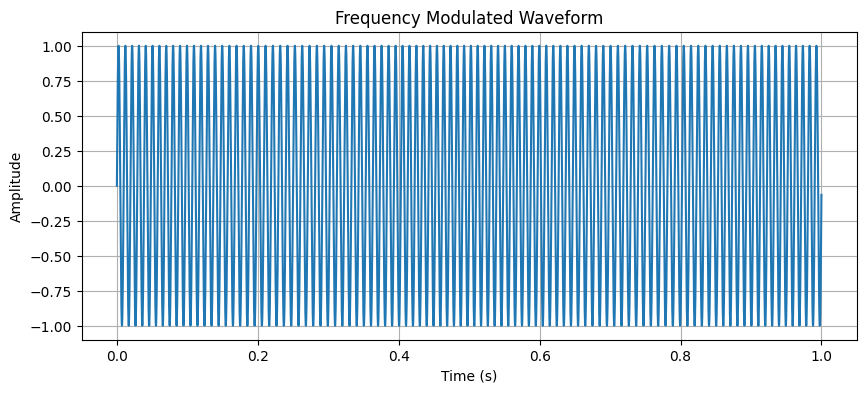

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
carrier_freq = 100.0       # Carrier frequency in Hz
modulating_freq = 2.0      # Modulating frequency in Hz
mod_index = 2.0            # Modulation index
sample_rate = 10000        # Samples per second
duration = 1.0             # Duration in seconds

# Create time array
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Generate modulating signal
modulating_signal = np.sin(2 * np.pi * modulating_freq * t)

# Generate frequency modulated signal
fm_signal = np.sin(2 * np.pi * carrier_freq * t + mod_index * modulating_signal)

# Plot the FM waveform
plt.figure(figsize=(10, 4))
plt.plot(t, fm_signal)
plt.title("Frequency Modulated Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


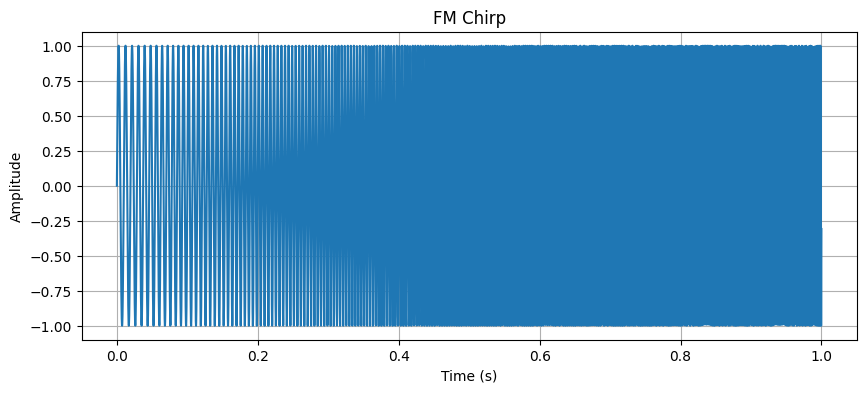

In [2]:
start_freq = 100.0
end_freq = 500.0
k = (end_freq - start_freq) / duration
chirp_signal = np.sin(2 * np.pi * (start_freq * t + 0.5 * k * t**2))

plt.figure(figsize=(10, 4))
plt.plot(t, chirp_signal)
plt.title("FM Chirp")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


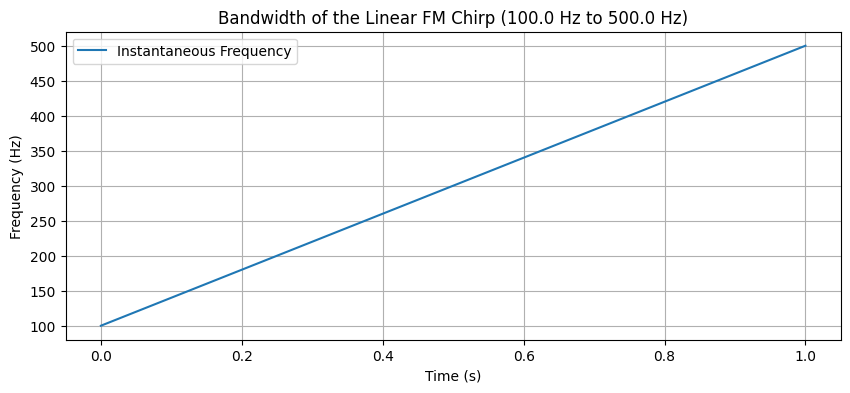

In [3]:
bandwidth = end_freq - start_freq
inst_freq = start_freq + k * t

plt.figure(figsize=(10, 4))
plt.plot(t, inst_freq, label="Instantaneous Frequency")
plt.title(f"Bandwidth of the Linear FM Chirp ({start_freq} Hz to {end_freq} Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.grid(True)
plt.legend()
plt.show()


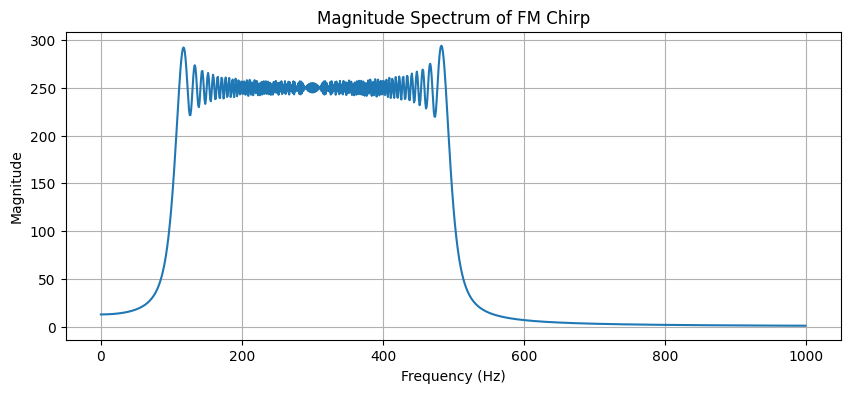

In [6]:
# Compute FFT of chirp signal
fft_chirp = np.fft.fft(chirp_signal)
freq = np.fft.fftfreq(len(t), t[1] - t[0])

# Plot magnitude spectrum
plt.figure(figsize=(10, 4))
plt.plot(freq[:1000], np.abs(fft_chirp)[:1000])
plt.title("Magnitude Spectrum of FM Chirp")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


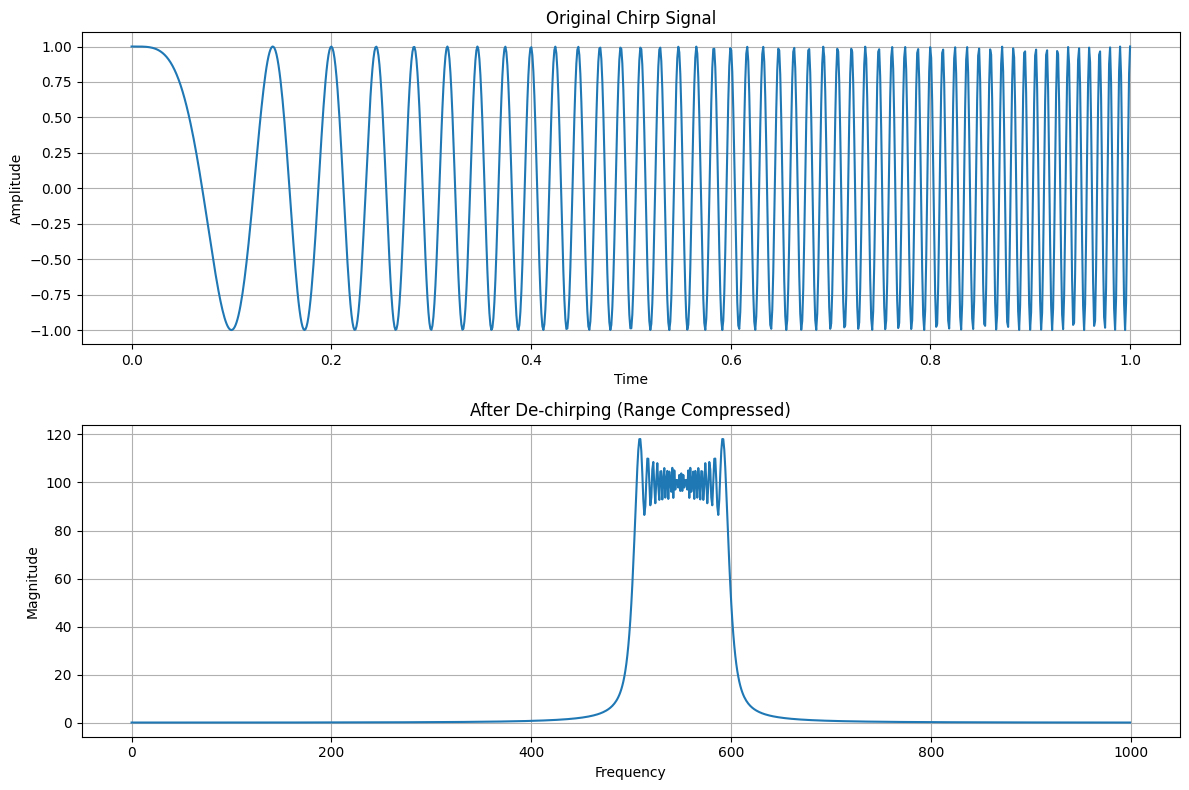

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create a chirp signal
def create_chirp(t, f0, f1, t1):
    return np.exp(1j * 2 * np.pi * (f0 * t + ((f1-f0)/(2*t1)) * t**2))

# Parameters
duration = 1000  # samples
t = np.linspace(0, 1, duration)
f0 = 0      # start frequency
f1 = 100    # end frequency

# Generate chirp
chirp = create_chirp(t, f0, f1, 1)

# Perform de-chirping (range compression)
dechirped = np.fft.fftshift(np.fft.fft(chirp))

# Create subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot original chirp
ax1.plot(t, np.real(chirp))
ax1.set_title('Original Chirp Signal')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax1.grid(True)

# Plot de-chirped signal
ax2.plot(np.abs(dechirped))
ax2.set_title('After De-chirping (Range Compressed)')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Magnitude')
ax2.grid(True)

plt.tight_layout()
plt.show()


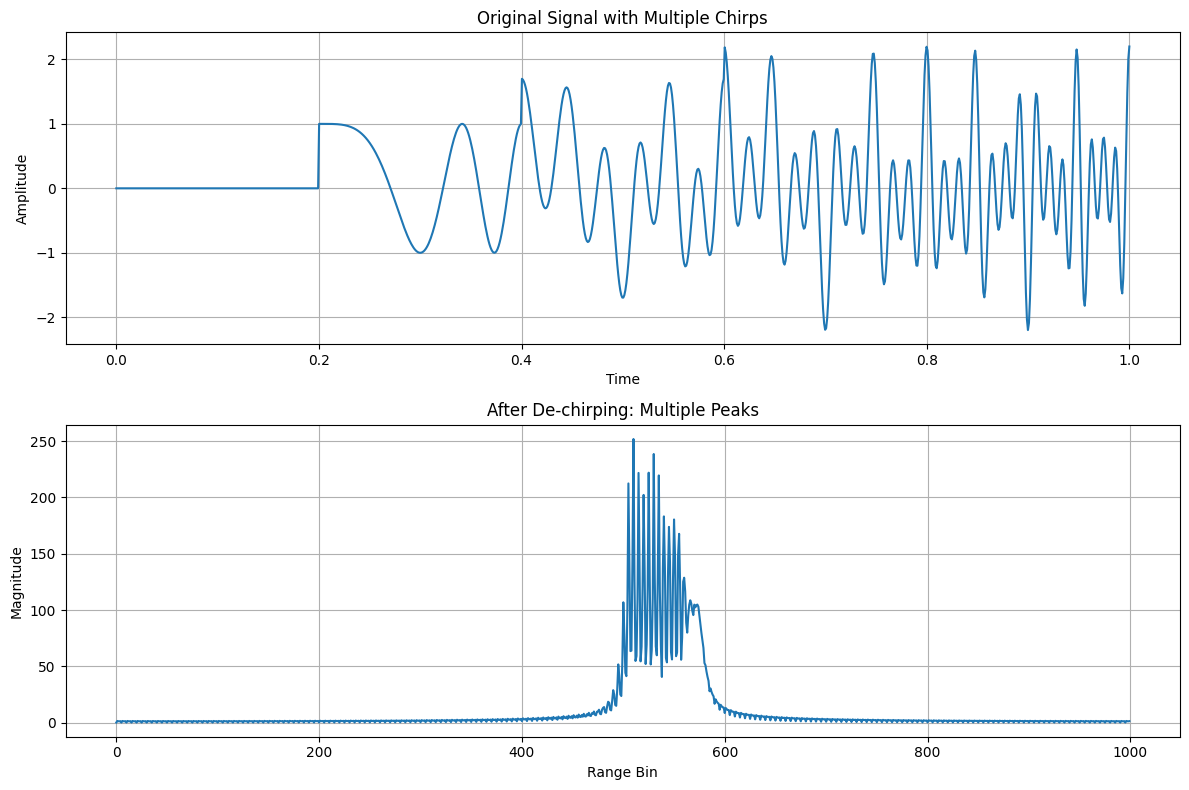

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create multiple chirps with different delays
def create_delayed_chirps(t, f0, f1, t1, delays, amplitudes):
    signal = np.zeros_like(t, dtype=complex)
    for delay, amp in zip(delays, amplitudes):
        # Shift the chirp by delay and multiply by amplitude
        shifted_t = t - delay
        signal += amp * np.exp(1j * 2 * np.pi * (f0 * shifted_t + ((f1-f0)/(2*t1)) * shifted_t**2)) * (shifted_t >= 0)
    return signal

# Parameters
duration = 1000
t = np.linspace(0, 1, duration)
f0 = 0
f1 = 100

# Create three targets at different ranges with different amplitudes
delays = [0.2, 0.4, 0.6]  # Different time delays
amplitudes = [1.0, 0.7, 0.5]  # Different reflection strengths

# Generate combined signal
combined_chirps = create_delayed_chirps(t, f0, f1, 1, delays, amplitudes)

# Perform de-chirping
dechirped = np.fft.fftshift(np.fft.fft(combined_chirps))

# Create subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot original signal
ax1.plot(t, np.real(combined_chirps))
ax1.set_title('Original Signal with Multiple Chirps')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax1.grid(True)

# Plot de-chirped signal
ax2.plot(np.abs(dechirped))
ax2.set_title('After De-chirping: Multiple Peaks')
ax2.set_xlabel('Range Bin')
ax2.set_ylabel('Magnitude')
ax2.grid(True)

plt.tight_layout()
plt.show()


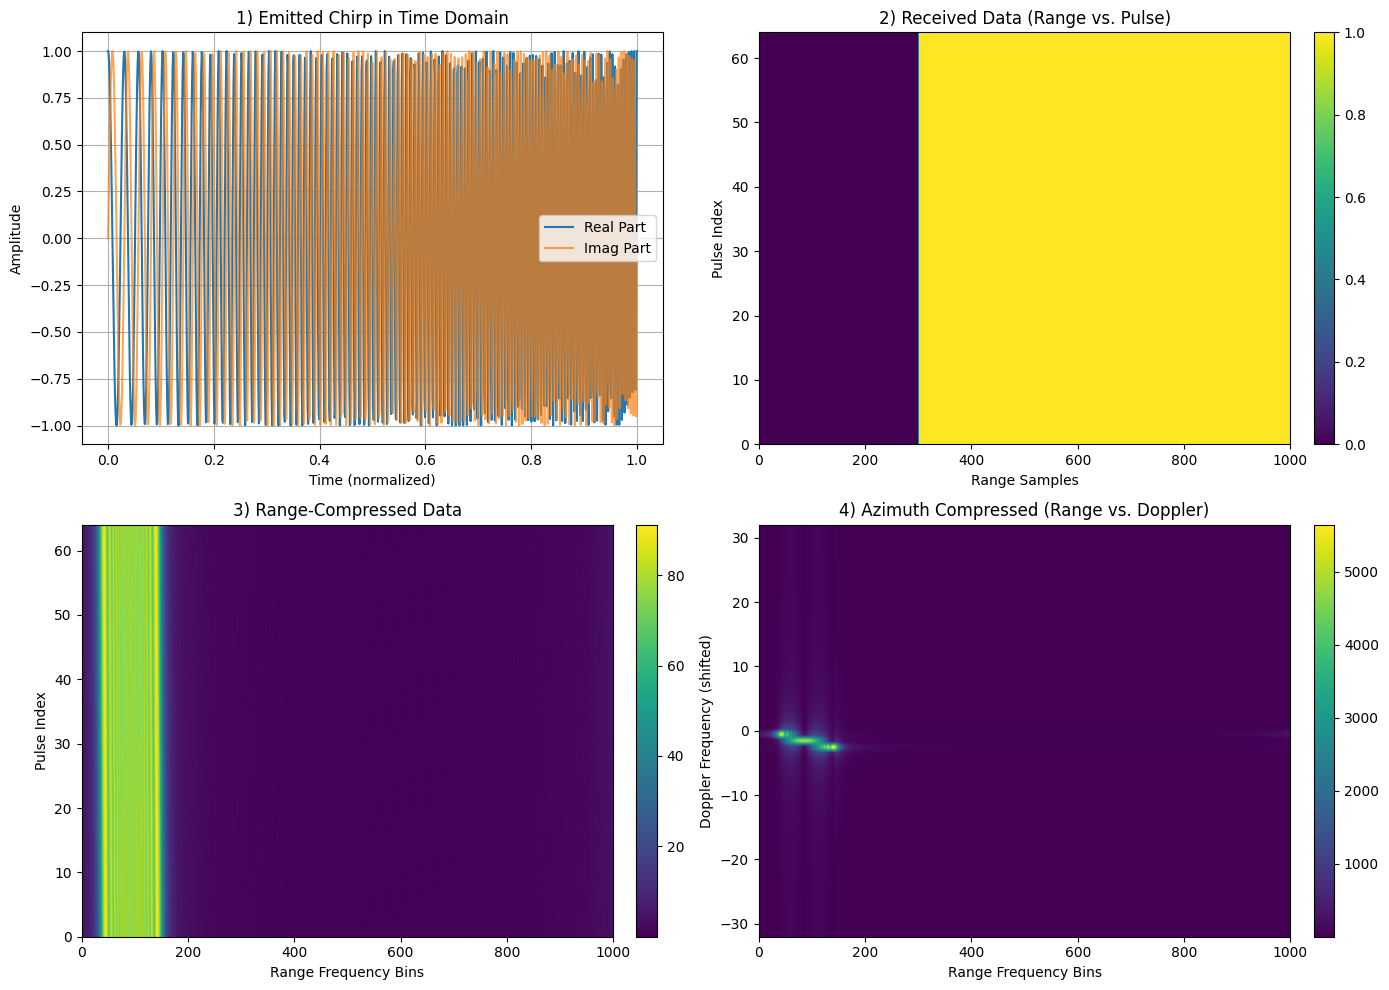

In [5]:
# Jupyter Notebook Example:
# Visualizing an FM Linear Chirp Being Emitted, Received, Range Compressed, 
# and Azimuth (Doppler) Compressed in Matplotlib
# ------------------------------------------------------------------------

# In[1]:
import numpy as np
import matplotlib.pyplot as plt

def create_chirp(t, f0, f1, t1):
    """
    Creates a linear frequency-modulated (FM) chirp signal.
      t   : 1D array of time samples
      f0  : start frequency
      f1  : end frequency
      t1  : total duration (in the same units as t)
    Returns:
      A complex 1D numpy array representing the chirp.
    """
    return np.exp(1j * 2 * np.pi * (f0 * t + ((f1 - f0) / (2 * t1)) * t**2))

# In[2]:
# 1) Define parameters and create the "emitted" chirp

duration = 1000           # Number of range samples (fast time)
t = np.linspace(0, 1, duration)
f0 = 30                   # Start frequency (arbitrary units)
f1 = 200                  # End frequency (arbitrary units)
chirp_emitted = create_chirp(t, f0, f1, 1)

# In[3]:
# 2) Simulate "received" data in a 2D array (pulses vs. range)
#    - We'll assume there's a single strong scatterer at a certain range bin
#    - We'll also add a slight Doppler shift each pulse to simulate motion

num_pulses = 64           # Azimuth dimension (slow time)
scatterer_range_bin = 300 # Where the scatterer "lives" in the range dimension
scatterer_phase_shift = 0.05  # Doppler shift factor per pulse

# Initialize the receive array
received_data = np.zeros((num_pulses, duration), dtype=complex)

for pulse_idx in range(num_pulses):
    # Slight Doppler phase shift for each pulse
    doppler_phase = np.exp(1j * 2 * np.pi * scatterer_phase_shift * pulse_idx * t)
    
    # Copy chirp, add Doppler shift
    pulse_signal = chirp_emitted * doppler_phase
    
    # Place the scatterer as if the echo returns from that range bin
    # In reality, you'd convolve with system impulse response,
    # but here, we'll inject a scaled, shifted version for demonstration.
    shifted_pulse = np.zeros_like(pulse_signal)
    if scatterer_range_bin < duration:
        shifted_pulse[scatterer_range_bin:] = pulse_signal[:duration - scatterer_range_bin]
    
    received_data[pulse_idx, :] = shifted_pulse

# In[4]:
# 3) Range Compression:
#   - FFT along the "range" dimension (axis=1) on each pulse
range_compressed = np.fft.fft(received_data, axis=1)

# 4) Doppler (Azimuth) Compression:
#   - FFT along the azimuth dimension (axis=0)
#   - fftshift to center zero-Doppler in the middle
doppler_compressed = np.fft.fftshift(np.fft.fft(range_compressed, axis=0), axes=0)

# In[5]:
# Create visualizations for each step in one figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# (a) Emitted Chirp (Time Domain)
axs[0, 0].plot(t, np.real(chirp_emitted), label='Real Part')
axs[0, 0].plot(t, np.imag(chirp_emitted), label='Imag Part', alpha=0.7)
axs[0, 0].set_title("1) Emitted Chirp in Time Domain")
axs[0, 0].set_xlabel("Time (normalized)")
axs[0, 0].set_ylabel("Amplitude")
axs[0, 0].grid(True)
axs[0, 0].legend()

# (b) Received Data (Raw 2D)
im1 = axs[0, 1].imshow(
    np.abs(received_data),
    aspect='auto',
    cmap='viridis',
    extent=[0, duration, 0, num_pulses]
)
axs[0, 1].set_title("2) Received Data (Range vs. Pulse)")
axs[0, 1].set_xlabel("Range Samples")
axs[0, 1].set_ylabel("Pulse Index")
fig.colorbar(im1, ax=axs[0, 1], fraction=0.046, pad=0.04)

# (c) After Range Compression
im2 = axs[1, 0].imshow(
    np.abs(range_compressed),
    aspect='auto',
    cmap='viridis',
    extent=[0, duration, 0, num_pulses]
)
axs[1, 0].set_title("3) Range-Compressed Data")
axs[1, 0].set_xlabel("Range Frequency Bins")
axs[1, 0].set_ylabel("Pulse Index")
fig.colorbar(im2, ax=axs[1, 0], fraction=0.046, pad=0.04)

# (d) Final Image: Azimuth/Doppler Compression
im3 = axs[1, 1].imshow(
    np.abs(doppler_compressed),
    aspect='auto',
    cmap='viridis',
    extent=[0, duration, -num_pulses/2, num_pulses/2]
)
axs[1, 1].set_title("4) Azimuth Compressed (Range vs. Doppler)")
axs[1, 1].set_xlabel("Range Frequency Bins")
axs[1, 1].set_ylabel("Doppler Frequency (shifted)")
fig.colorbar(im3, ax=axs[1, 1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

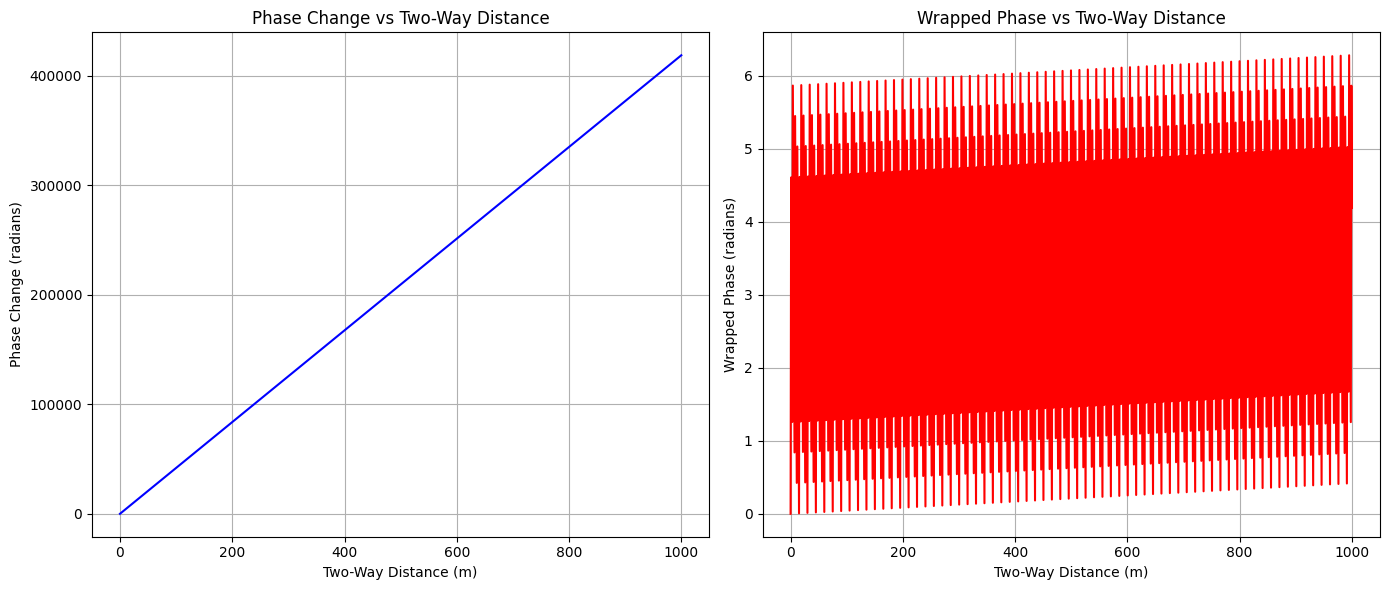

In [6]:
# Create a new figure for phase change analysis
plt.figure(figsize=(14, 6))

# Calculate phase change
wavelength = 0.03  # X-band wavelength in meters (approximate)
two_way_distance = np.linspace(0, 1000, 1000)  # Range of distances in meters
phase_change = (4 * np.pi * two_way_distance) / wavelength  # 4π because of two-way travel

# Plot phase change vs distance
plt.subplot(1, 2, 1)
plt.plot(two_way_distance, phase_change, 'b-')
plt.title('Phase Change vs Two-Way Distance')
plt.xlabel('Two-Way Distance (m)')
plt.ylabel('Phase Change (radians)')
plt.grid(True)

# Plot wrapped phase to show cyclic nature
plt.subplot(1, 2, 2)
plt.plot(two_way_distance, np.mod(phase_change, 2*np.pi), 'r-')
plt.title('Wrapped Phase vs Two-Way Distance')
plt.xlabel('Two-Way Distance (m)')
plt.ylabel('Wrapped Phase (radians)')
plt.grid(True)

plt.tight_layout()
plt.show()


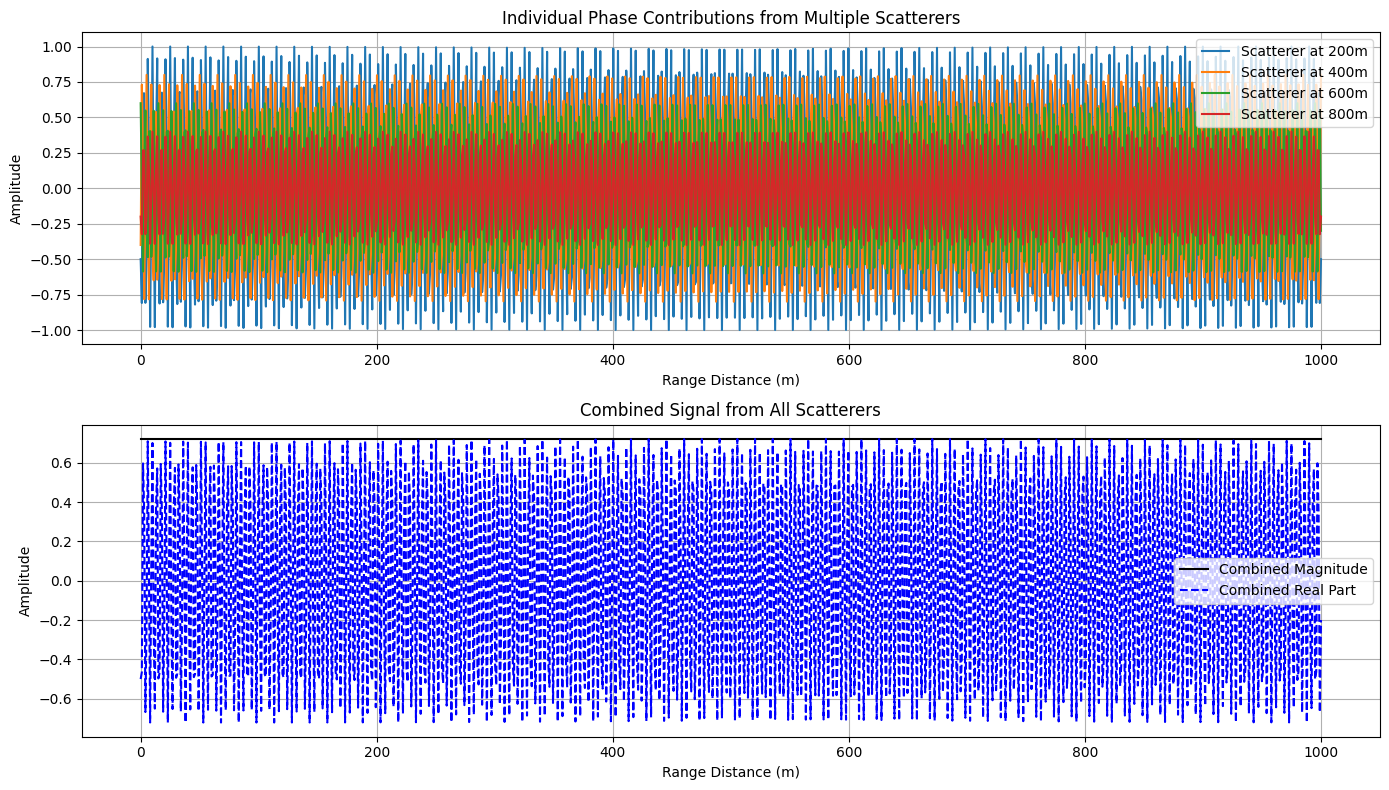

In [7]:
# Create a figure to illustrate phase contributions from multiple scatterers
plt.figure(figsize=(14, 8))

# Define parameters
num_scatterers = 4
distances = np.array([200, 400, 600, 800])  # Distances of scatterers in meters
amplitudes = np.array([1.0, 0.8, 0.6, 0.4])  # Relative amplitudes of scatterers
two_way_distance = np.linspace(0, 1000, 1000)
wavelength = 0.03  # X-band wavelength in meters

# Calculate individual phase contributions
phase_contributions = np.zeros((num_scatterers, len(two_way_distance)))
total_signal = np.zeros(len(two_way_distance), dtype=complex)

for i in range(num_scatterers):
    # Phase contribution from each scatterer
    phase = (4 * np.pi * (two_way_distance - distances[i])) / wavelength
    phase_contributions[i] = amplitudes[i] * np.cos(phase)
    total_signal += amplitudes[i] * np.exp(1j * phase)

# Plot individual contributions
plt.subplot(2, 1, 1)
for i in range(num_scatterers):
    plt.plot(two_way_distance, phase_contributions[i], 
             label=f'Scatterer at {distances[i]}m')
plt.title('Individual Phase Contributions from Multiple Scatterers')
plt.xlabel('Range Distance (m)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot combined signal
plt.subplot(2, 1, 2)
plt.plot(two_way_distance, np.abs(total_signal), 'k-', 
         label='Combined Magnitude')
plt.plot(two_way_distance, np.real(total_signal), 'b--', 
         label='Combined Real Part')
plt.title('Combined Signal from All Scatterers')
plt.xlabel('Range Distance (m)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
